# Imports

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [26]:
df = pd.read_csv("assets/BankChurners.csv", sep=",")
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

# Clean the Datas

In [27]:
# Drop the last two columns, they are invalid
df.drop(columns=[df.columns[len(df.columns)-1], df.columns[len(df.columns)-2]], axis=1, inplace=True)
# Set the index to CLIENTNUM
df.set_index("CLIENTNUM", inplace=True)

df.head(5)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

## Categorize Income_Category

In [28]:
df["Income_Category"] = df["Income_Category"].astype('category').cat.codes
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   
...                      ...           ...    ...              ...   
772366833  Existing Customer            50      M                2   
710638233  Attrited Customer            41      M                2   
716506083  Attrited Customer            44      F                1   
717406983  Attrited Customer            30      M                2   
714337233  Attrited Customer            43      F                2   

          Education_Level Marital_Status  Income_Category Card_Category  \
CLIENTNUM                                                                 
768805383     High School        Married                2          Blue   
818770008        Graduate         Single                4          Blue   
713982108        Graduate        Married                3          Blue   
769911858     High School        Unknown                4          Blue   
709106358      Uneducated        Married                2          Blue   
...                   ...            ...              ...           ...   
772366833        Graduate         Single                1          Blue   
710638233         Unknown       Divorced                1          Blue   
716506083     High School        Married                4          Blue   
717406983        Graduate        Unknown                1          Blue   
714337233        Graduate        Married                4        Silver   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   
...                   ...                       ...                     ...   
772366833              40                         3                       2   
710638233              25                         4                       2   
716506083              36                         5                       3   
717406983              36                         4                       3   
714337233              25                         6                       2   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   
...                          ...           ...                  ...   
772366833                      3        4003.0                 1851   
710638233                      3        4277.0                 2186   
716506083                      4        5409.0                    0   
717406983                      3        5281.0                    0   
714337233                      4       10388.0                 1961   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0           

## Label Attrition_flag

In [29]:
df["Attrition_Flag"] = df["Attrition_Flag"].astype('category').cat.codes.replace({0:1, 1:0})
df.head(3)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                         
768805383               0            45      M                3   
818770008               0            49      F                5   
713982108               0            51      M                3   

          Education_Level Marital_Status  Income_Category Card_Category  \
CLIENTNUM                                                                 
768805383     High School        Married                2          Blue   
818770008        Graduate         Single                4          Blue   
713982108        Graduate        Married                3          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000

## Label Gender

In [30]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head(3)

Attrition_Flag  Customer_Age  Gender  Dependent_count  \
CLIENTNUM                                                          
768805383               0            45       1                3   
818770008               0            49       0                5   
713982108               0            51       1                3   

          Education_Level Marital_Status  Income_Category Card_Category  \
CLIENTNUM                                                                 
768805383     High School        Married                2          Blue   
818770008        Graduate         Single                4          Blue   
713982108        Graduate        Married                3          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000

# Analyze Datas

## Correlations

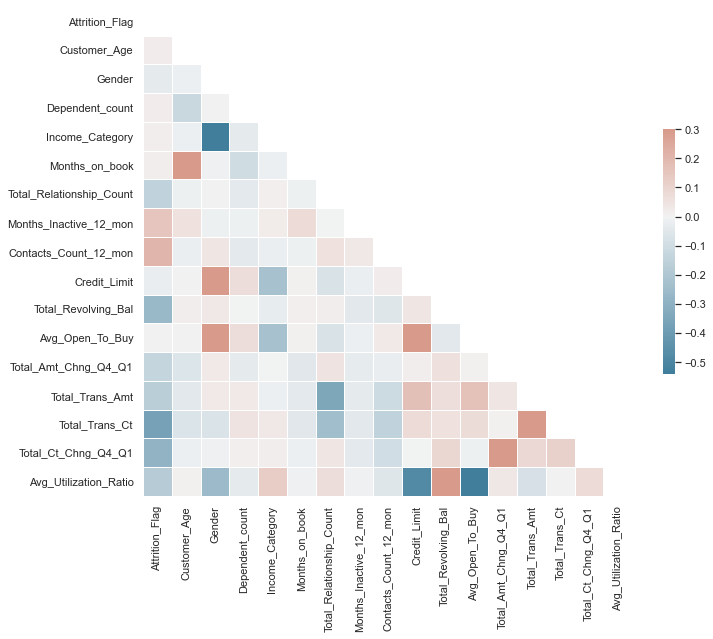

In [32]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

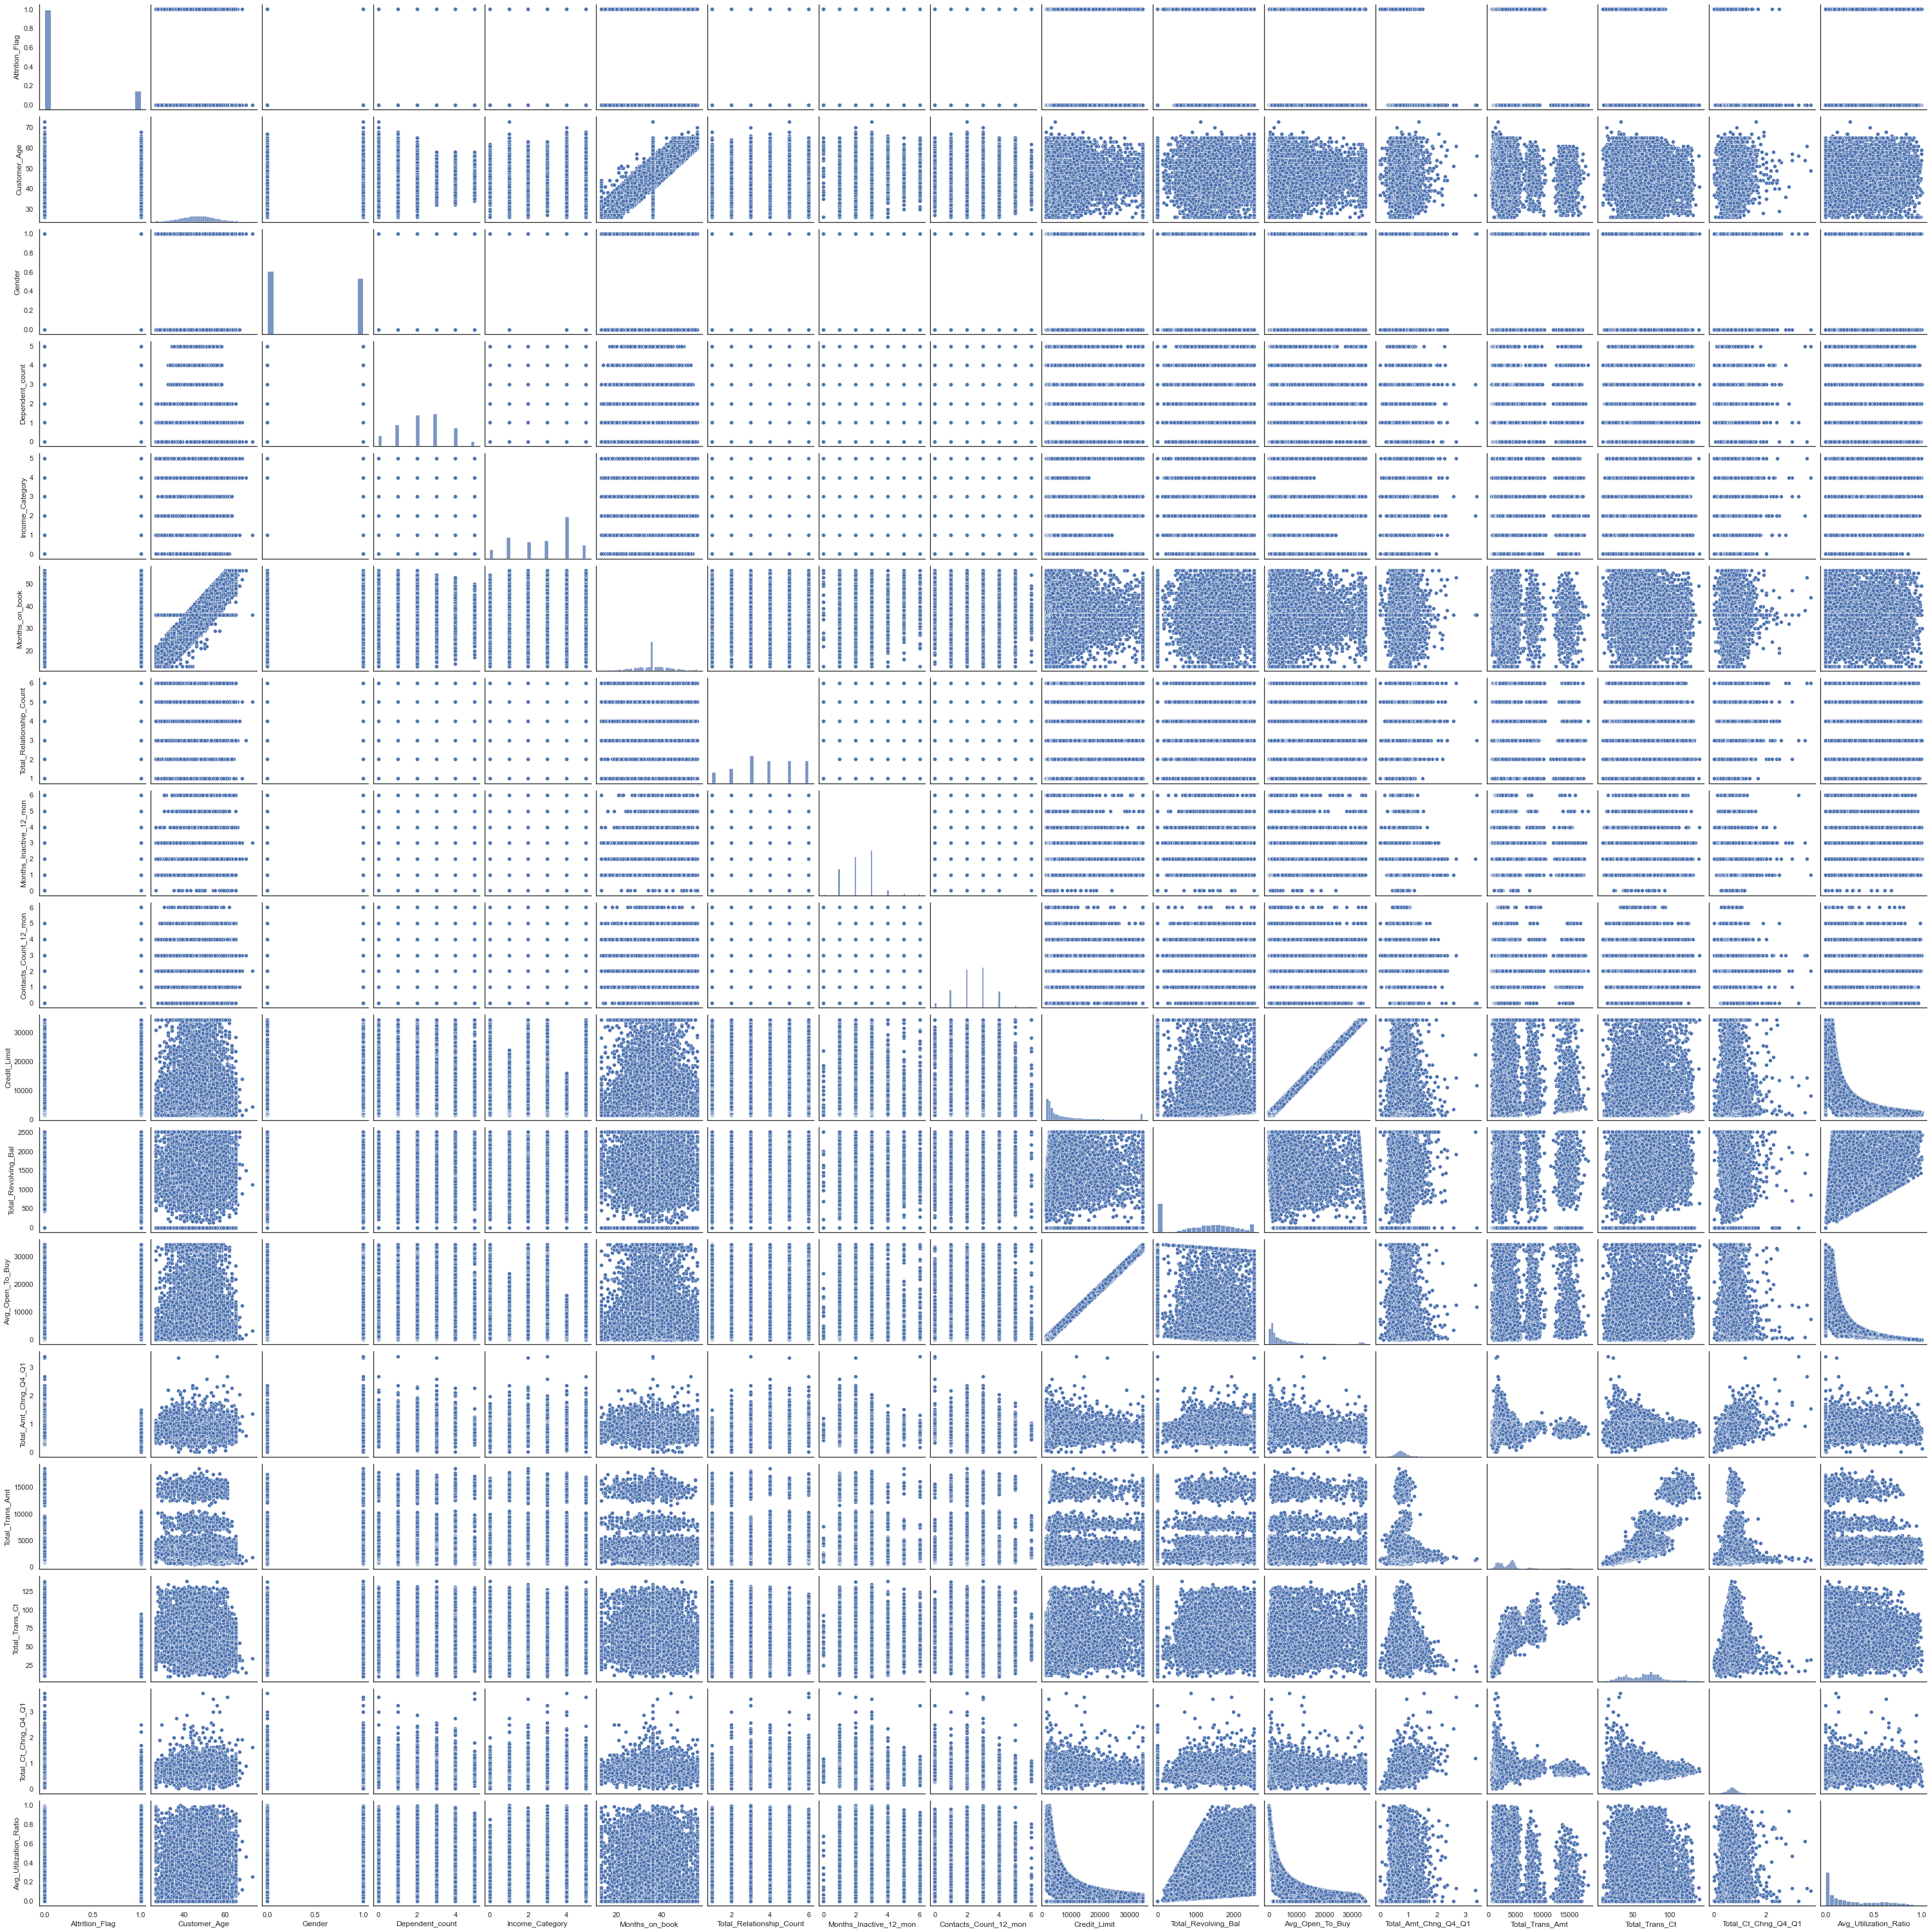

In [34]:
sns.pairplot(data=df)

In [51]:
df.groupby("Attrition_Flag").max()

Customer_Age Gender  Dependent_count Education_Level  \
Attrition_Flag                                                            
Attrited Customer            68      M                5         Unknown   
Existing Customer            73      M                5         Unknown   

                  Marital_Status  Income_Category Card_Category  \
Attrition_Flag                                                    
Attrited Customer        Unknown                5        Silver   
Existing Customer        Unknown                5        Silver   

                   Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                                
Attrited Customer              56                         6   
Existing Customer              56                         6   

                   Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                                                     
Attrited Customer                       6                      6   
Existing Customer                       6                      5   

                   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag                                                          
Attrited Customer       34516.0                 2517          34516.0   
Existing Customer       34516.0                 2517          34516.0   

                   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Attrition_Flag                                                             
Attrited Customer                 1.492            10583              94   
Existing Customer                 3.397            18484             139   

                   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                 
Attrited Customer                2.500                  0.999  
Existing Customer                3.714                  0.994